<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# The Basics

## Simple Plots

Matplotlib is imported as such

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Some very simple plotting can be achieved as follows

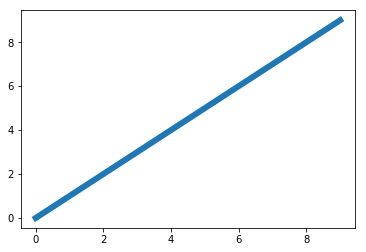

In [10]:
data = np.arange(10)

plt.plot(data)
plt.show()

## Figures and Subplots

Plots reside in a <i> Figure </i> object. We can initialize a figure as such.

In [4]:
fig = plt.figure()

Plots cannot be created with a blank figure. One or more <i>subplots</i> need to be added using <i> add_subplot </i>.

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

The notation above means that the figure should be 2x2 and that we're using the first of these 4 subplots. We add a few more subplots below.

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

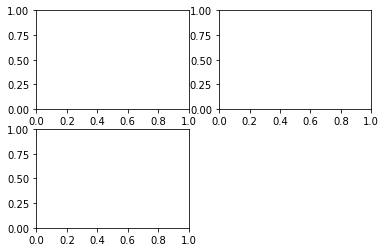

In [7]:
fig

When issuing a command like plt.plot([1,2,3]) matplotlib draws on the last figure and subplot used. Issuing the following command thus does 

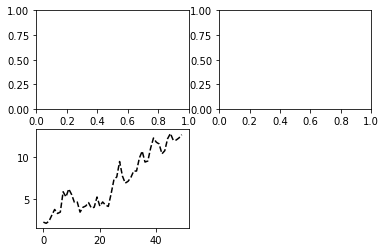

In [8]:
plt.plot(np.random.randn(50).cumsum(), 'k--')
fig

The 'k--' is a style option which instructs matplotlib to draw a black dashed line. We can also draw on the first two plots as well:

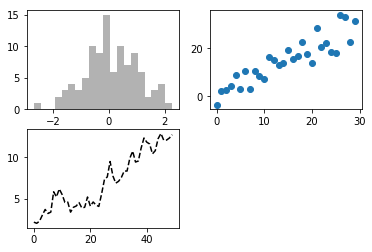

In [9]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
fig

<b> IMPORTANT: </b> It is typically good practice to put all plotting commands in one cell. If we were to run the cell above again, we would get things drawn over top of eachother: 

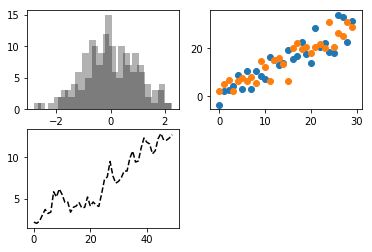

In [10]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
fig

## Ideal Plotting Cell in Jupyter Notebook

If we run this cell twice, things are not drawn over top of eachother.

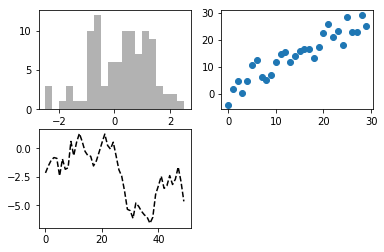

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')

fig

A comprehensive guide of the plot types (hist, scatter, etc..) in matplotlib can be found at http://matplotlib.sourceforge.net

## Quick Way to Create a Figure with Subplots

The command below demonstrates a fast way to create a new figure and a number of subplots.

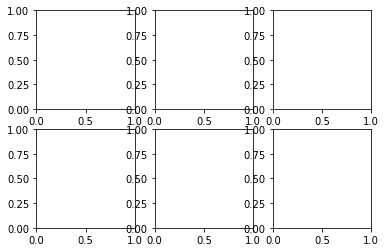

In [12]:
fig, axes = plt.subplots(2, 3)
fig

The 'axes' object is a two dimensional array where the indices represent the location of the subplot.

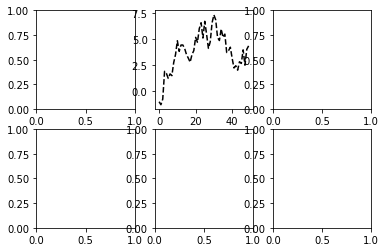

In [13]:
axes[0, 1].plot(np.random.randn(50).cumsum(), 'k--') #row, column format
fig

## Adjusting Spacing Around Subplots

As one may notice, the spacing between the plots above is very close and the numbers overlap. We can change this by using the <i> subplots_adjust </i> method.

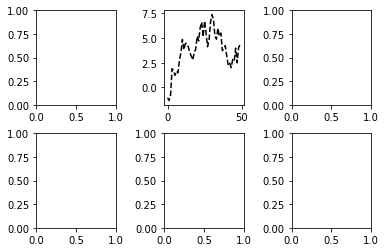

In [14]:
fig.subplots_adjust(wspace = 0.6, hspace = 0.3)
fig

### How the Spacing Scale is defined

If we set wspace (width spacing) or hspace (height spacing) to 1, then the spacing between plots is the same as the area of the plots.

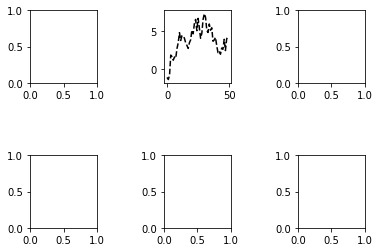

In [15]:
fig.subplots_adjust(wspace = 1, hspace = 1)
fig

The scale is set using this basis, and the scaling is linear.

# Colours, Markers, and Line Styles

## Colours

Matplotlib's main plot function accepts two arrays and an optional string indicating color and linestyle:

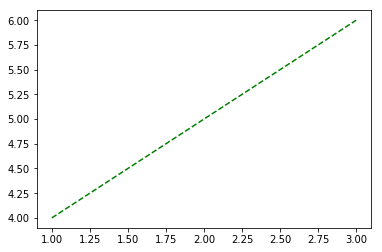

In [16]:
fig, ax = plt.subplots()
ax.plot([1,2,3], [4,5,6], 'g--')
fig

We can also plot more explicitly using the linestyle and color options.

In [17]:
ax.plot([4,5,6], [1,2,3], color = 'b', linestyle = '--')

There are a number of colour abbreviations but we can specify any hex code we wish.

In [18]:
ax.plot([1,2,3], [1,2,3], color = '#CECECE', linestyle = '--')

## Markers

We can specify the marker in the less-explicit string argument after the colour (here the 'o' in 'go--'):

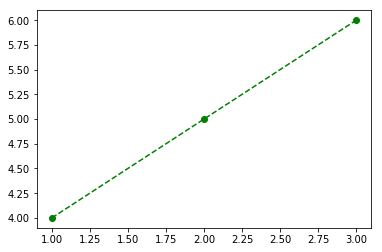

In [19]:
fig, ax = plt.subplots()
ax.plot([1,2,3], [4,5,6], 'go--')
fig

Or we can use the more explicit arguments:

In [20]:
ax.plot([1,2,3], [4,5,6], color = 'k', linestyle = 'dotted', marker = 'o')

## Linestyles

We have already discussed how to include linestyles (dashed, dotted, etc..). Notice that in all the previous plots, the connecting lines are linearly interpolated. We can change this using the drawstyle argument.

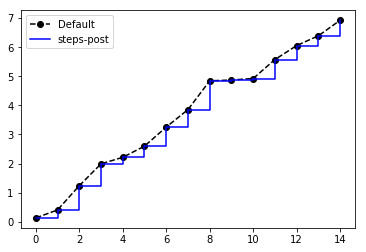

In [21]:
data = np.random.rand(15).cumsum()

fig, ax = plt.subplots()
ax.plot(data, 'ko--', label='Default')
ax.plot(data, 'b-', drawstyle='steps-post', label='steps-post')
ax.legend(loc='best')
fig

# Ticks, Labels, and Legends

## Setting the title, axis labels, and ticklabels

Consider the following plot.

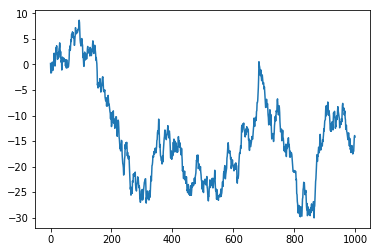

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
fig

Change where the ticks are placed:

In [23]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

Give the ticks special labels:

In [24]:
labels = ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='small')

Set title and x axis label, then show plot:

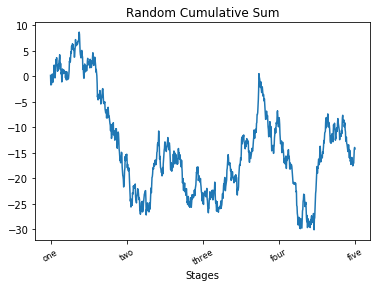

In [25]:
ax.set_title('Random Cumulative Sum')
ax.set_xlabel('Stages')
fig

### A quick and interesting approach to all this

Matplotlib also allows us to use dictionaries to set all these props. Most of this code can be accomplished using a dictionary.

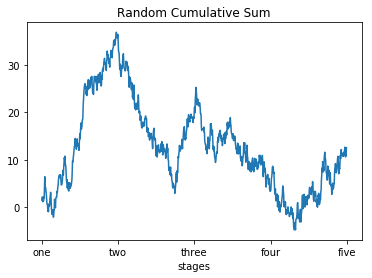

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

props = {'title': 'Random Cumulative Sum',
        'xlabel': 'stages',
        'xticks': [0,250,500,750,1000],
        'xticklabels': ['one','two','three','four','five']}

tick_props = {'rotation': 30}

ax.set(**props)
fig

## Adding Legends (Basics)

Legends can be created if the plot elements are given labels. Once simply needs to call ax.legend() and the legend object will be added to the plot.

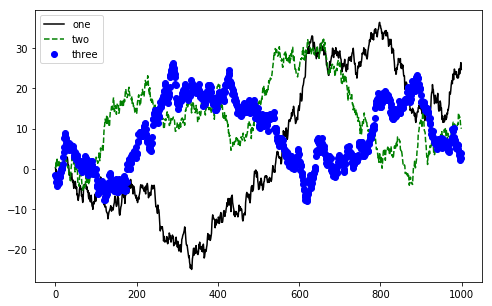

In [27]:
fig = plt.figure(figsize=(8,5)); ax = fig.add_subplot(1,1,1)

ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'g--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'bo', label='three')

ax.legend(loc='best')
fig

<i>loc</i> tells matplotlib where to place the plot. 'best' is usually a good option as it puts the legend the most out of the way. There are other options as well; if we want to put the top right hand corner of the legend in the center of the plot we can use

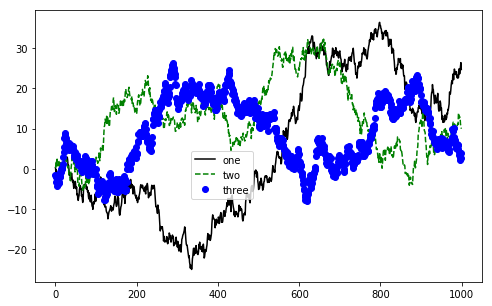

In [28]:
ax.legend(loc='upper right', bbox_to_anchor=(0.5, 0.5))
fig

# Annotations and Drawing on Subplots

## Adding Text and Arrows

We can draw on plots with text, arrows, and other shapes. For example...

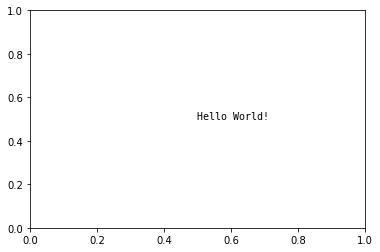

In [29]:
fig, ax = plt.subplots()
ax.text(0.5, 0.5, 'Hello World!', family='monospace', fontsize=10)
fig

Arrows can also be drawn on plots. First we create a list of tuples "interesting points" with the x coordinate and label we wish to add. 

In the <i> ax.annotate </i> method, we specify the label, the xy location (bottom of arrow), the xytext location (location of text and top of arrow), and then a few details about the arrow in arrowprops. Finally, we specify how the text is situated with respect to the arrow with the horizontalalignment argument.

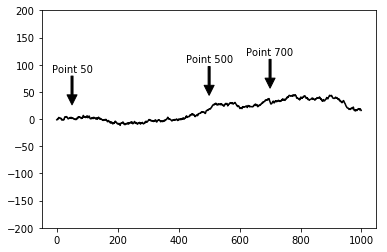

In [30]:
fig, ax = plt.subplots()

y = np.random.randn(1000).cumsum()
ax.plot(y,'k')
ax.set_ylim(-200,200)

interesting_points = [(50, 'Point 50'), (500, 'Point 500'), (700, 'Point 700')]

for pnt, label in interesting_points:
    ax.annotate(label, xy=(pnt, y[pnt]+25),
                xytext = (pnt, y[pnt]+100),
               arrowprops=dict(facecolor='black', headwidth=10, width=2, headlength=10),
               horizontalalignment='center', verticalalignment='top')
     
fig
    

## Adding more Complicated Shapes

Drawing shapes (<i> patches </i>) requires more care as each shape takes in slightly different parameters. For example,

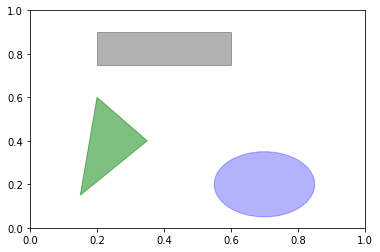

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

fig

# Saving Plots to File

## Saving Plots as Image Files

Plots can be saved as image files (png, pdf, etc...) as such.

In [32]:
fig, ax = plt.subplots()
ax.plot([1,2,3],[4,5,6], 'go--')
fig.savefig('sample_plot.png', dpi=400, bbox_inches='tight')

'dpi' controls the dots per inch resolution and 'bbox_inches' controls the whitespace shown around the plot. Note that it is often preferred to save plots as pdfs.

In [33]:
fig.savefig('sample_plot.pdf', dpi=400, bbox_inches='tight')

# Configuring Matplotlib Settings at Beginning of Notebook

Suppose we want to change the global text size or always want a certain figure size. We can change these options globally at the beginning of our program.

In [34]:
plt.rc('figure', figsize=(10,10))

Maybe we want to change the font options. We can do this in a similar fashion.

In [35]:
font_options = {'family': 'monospace',
               'weight': 'bold',
               'size': 18}
plt.rc('font', **font_options)

Notice that the plot has changed below:

In [36]:
fig, ax = plt.subplots()
ax.plot([1,2,3],[4,5,6], 'go--')
fig.savefig('sample_plot.png', dpi=400, bbox_inches='tight')